In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('../input/train_set.csv')
test = pd.read_csv('../input/test_set.csv')

In [3]:
train.shape, test.shape

((25317, 18), (10852, 17))

In [4]:
train.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,43,management,married,tertiary,no,291,yes,no,unknown,9,may,150,2,-1,0,unknown,0
1,2,42,technician,divorced,primary,no,5076,yes,no,cellular,7,apr,99,1,251,2,other,0
2,3,47,admin.,married,secondary,no,104,yes,yes,cellular,14,jul,77,2,-1,0,unknown,0
3,4,28,management,single,secondary,no,-994,yes,yes,cellular,18,jul,174,2,-1,0,unknown,0
4,5,42,technician,divorced,secondary,no,2974,yes,no,unknown,21,may,187,5,-1,0,unknown,0


In [5]:
test.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,25318,51,housemaid,married,unknown,no,174,no,no,telephone,29,jul,308,3,-1,0,unknown
1,25319,32,management,married,tertiary,no,6059,yes,no,cellular,20,nov,110,2,-1,0,unknown
2,25320,60,retired,married,primary,no,0,no,no,telephone,30,jul,130,3,-1,0,unknown
3,25321,32,student,single,tertiary,no,64,no,no,cellular,30,jun,598,4,105,5,failure
4,25322,41,housemaid,married,secondary,no,0,yes,yes,cellular,15,jul,368,4,-1,0,unknown


In [6]:
train.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
test.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [8]:
#标签分布
train['y'].value_counts()

0    22356
1     2961
Name: y, dtype: int64

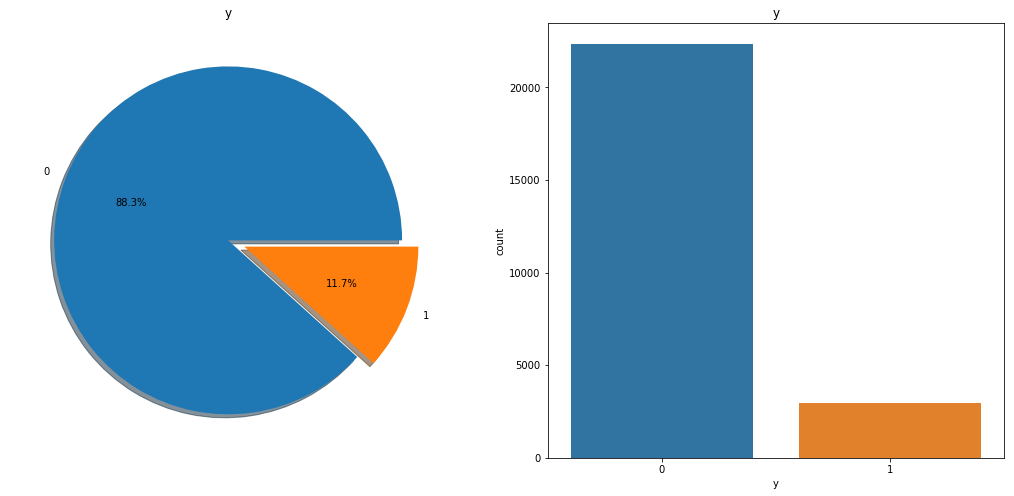

In [9]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['y'].value_counts().plot.pie(explode=[0,0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('y')
ax[0].set_ylabel('')
sns.countplot('y', data=train, ax=ax[1])
ax[1].set_title('y')
plt.show()

大部分客户为0，代表不会购买，这是一个样本不均衡的问题。

In [10]:
#对特征分一下类别
cat_features = ['job','marital','education','default','housing','loan','contact']
num_features = ['age','balance','day','month','duration','campaign','pdays','previous','poutcome']

In [11]:
#查看一下客户职业和标签的关系
pd.crosstab(train.job,train.y,margins=True).style.background_gradient(cmap='summer_r')

y,0,1,All
job,,,
admin.,2568,341,2909
blue-collar,5069,387,5456
entrepreneur,789,67,856
housemaid,605,58,663
management,4560,736,5296
retired,975,298,1273
self-employed,779,105,884
services,2131,211,2342
student,390,143,533


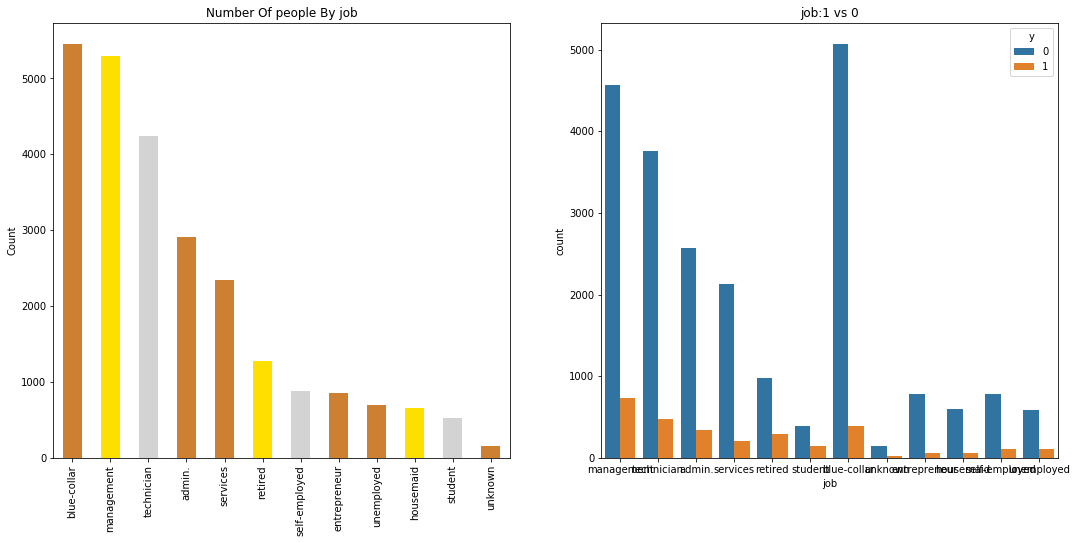

In [12]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['job'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of people By job')
ax[0].set_ylabel('Count')
sns.countplot('job',hue='y',data=train,ax=ax[1])
ax[1].set_title('job:1 vs 0')
plt.show()

不同职业对购买的确有影响

In [13]:
#查看一下婚姻状况和标签的关系
pd.crosstab(train.marital,train.y,margins=True).style.background_gradient(cmap='summer_r')

y,0,1,All
marital,,,
divorced,2567,348,2915
married,13680,1565,15245
single,6109,1048,7157
All,22356,2961,25317


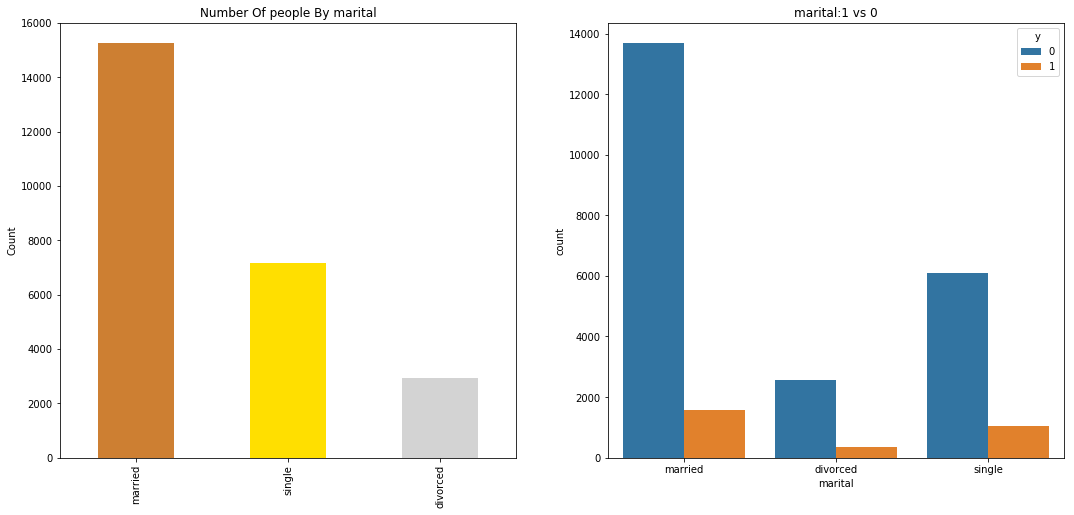

In [14]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['marital'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of people By marital')
ax[0].set_ylabel('Count')
sns.countplot('marital',hue='y',data=train,ax=ax[1])
ax[1].set_title('marital:1 vs 0')
plt.show()

婚姻状况似乎并没有太大影响

In [15]:
#研究一下违约记录
train.groupby(['default','y'])['y'].count()

default  y
no       0    21934
         1     2935
yes      0      422
         1       26
Name: y, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


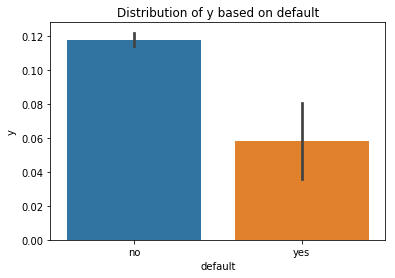

In [16]:
sns.barplot(x="default", y="y", data=train)
plt.title("Distribution of y based on default")
plt.show()

违约记录表明 没有违约记录的人更有可能购买产品

In [17]:
#查看一下受教育水平和标签的关系
pd.crosstab(train.education,train.y,margins=True).style.background_gradient(cmap='summer_r')

y,0,1,All
education,,,
primary,3524,324,3848
secondary,11598,1359,12957
tertiary,6328,1119,7447
unknown,906,159,1065
All,22356,2961,25317


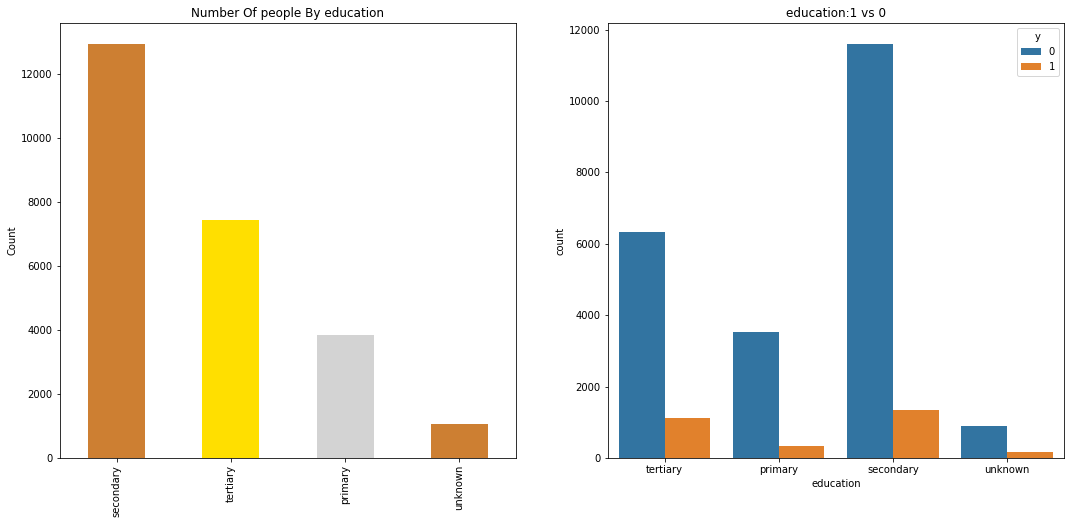

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['education'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of people By education')
ax[0].set_ylabel('Count')
sns.countplot('education',hue='y',data=train,ax=ax[1])
ax[1].set_title('education:1 vs 0')
plt.show()

可以看出tertiary与secondary有很大的区别 总体来说，受教育水平越高，购买可能性应该越大

In [19]:
#研究一下受否有住房贷款
train.groupby(['housing','y'])['y'].count()

housing  y
no       0     9395
         1     1902
yes      0    12961
         1     1059
Name: y, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


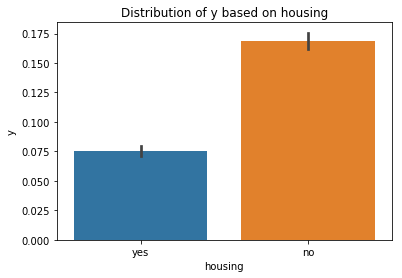

In [20]:
sns.barplot(x="housing", y="y", data=train)
plt.title("Distribution of y based on housing")
plt.show()

总体来说没有住房贷款的人更有可能购买

In [21]:
#研究一下是否有个人贷款
train.groupby(['loan','y'])['y'].count()

loan  y
no    0    18577
      1     2681
yes   0     3779
      1      280
Name: y, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


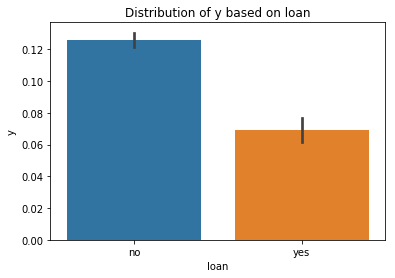

In [22]:
sns.barplot(x="loan", y="y", data=train)
plt.title("Distribution of y based on loan")
plt.show()

与住房贷款的情况基本一致，可以提取一个特征，既有购房贷款也有购物贷款

In [23]:
#查看一下与客户的沟通方式
pd.crosstab(train.contact,train.y,margins=True).style.background_gradient(cmap='summer_r')

y,0,1,All
contact,,,
cellular,13950,2441,16391
telephone,1411,234,1645
unknown,6995,286,7281
All,22356,2961,25317


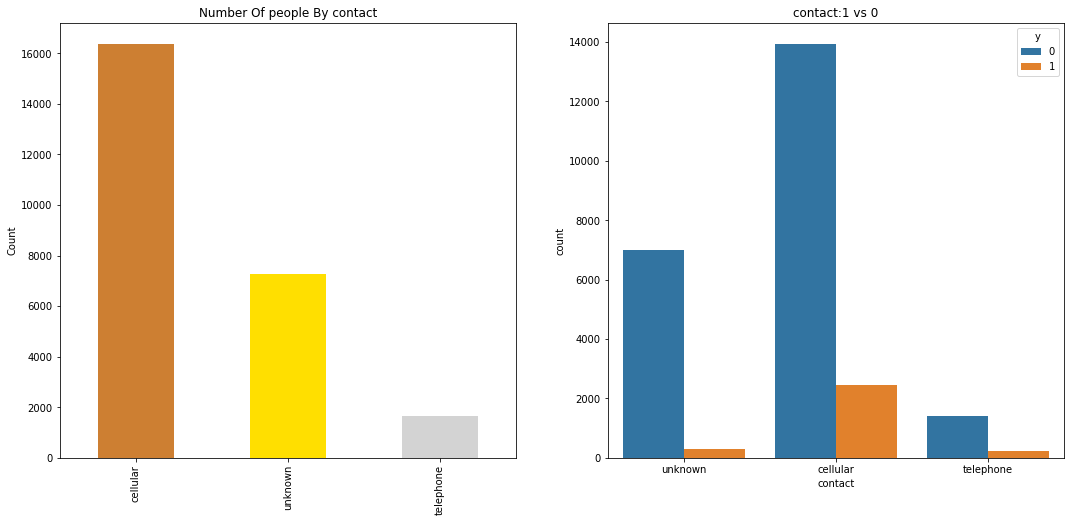

In [24]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['contact'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of people By contact')
ax[0].set_ylabel('Count')
sns.countplot('contact',hue='y',data=train,ax=ax[1])
ax[1].set_title('contact:1 vs 0')
plt.show()

unknown与其他两类有很大差距，应该作为一个新的类别

In [25]:
#查看一下上一次活动的结果
pd.crosstab(train.poutcome,train.y,margins=True).style.background_gradient(cmap='summer_r')

y,0,1,All
poutcome,,,
failure,2385,350,2735
other,882,188,1070
success,293,542,835
unknown,18796,1881,20677
All,22356,2961,25317


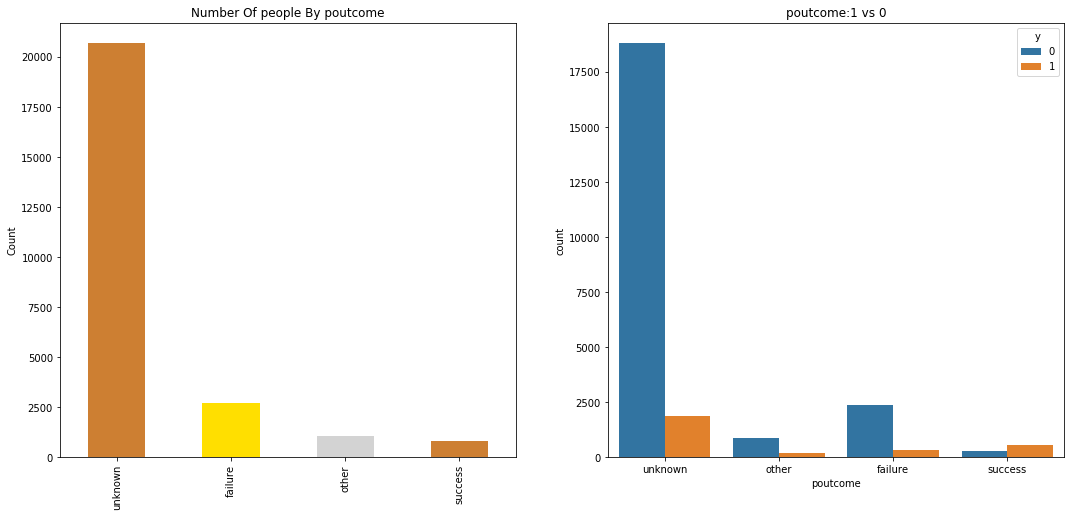

In [26]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['poutcome'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of people By poutcome')
ax[0].set_ylabel('Count')
sns.countplot('poutcome',hue='y',data=train,ax=ax[1])
ax[1].set_title('poutcome:1 vs 0')
plt.show()

上次成功的不多，但是上次成功的有很大倾向这次还要购买

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


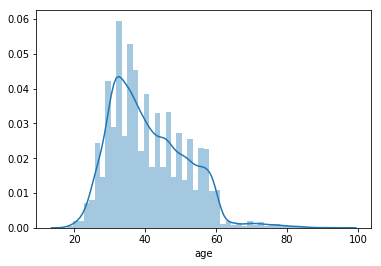

In [27]:
#查看一下年龄的分布
sns.distplot(train["age"])

年龄偏态分布，考虑做log转换，以及分段（可能会好一点）

In [28]:
train['age'].describe()

count    25317.000000
mean        40.935379
std         10.634289
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

In [29]:
def trans_age(x):
    if x<30:
        x=1
    elif x<40:
        x=2
    elif x<60:
        x=3
    else:
        x=4
    return x
train['age_cut'] = train['age'].apply(trans_age)

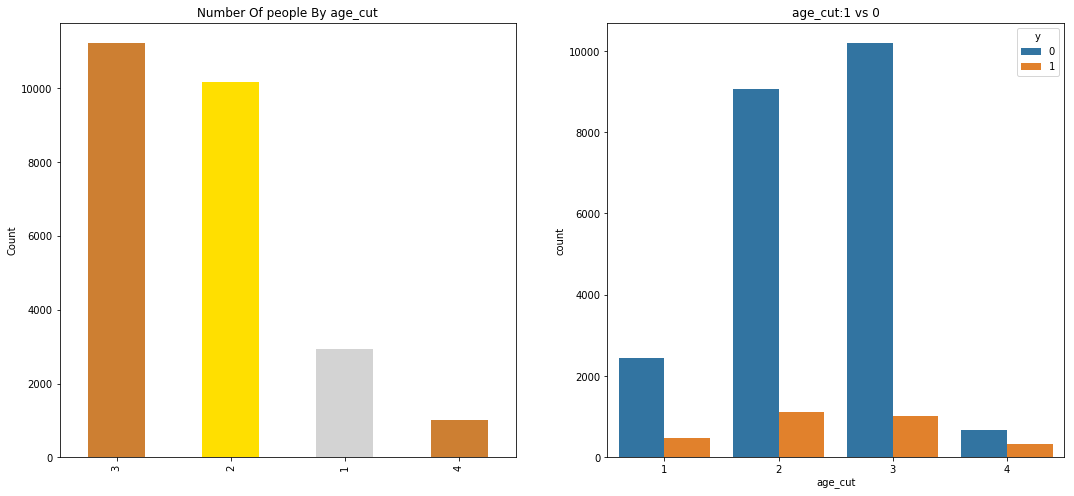

In [30]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['age_cut'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of people By age_cut')
ax[0].set_ylabel('Count')
sns.countplot('age_cut',hue='y',data=train,ax=ax[1])
ax[1].set_title('age_cut:1 vs 0')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


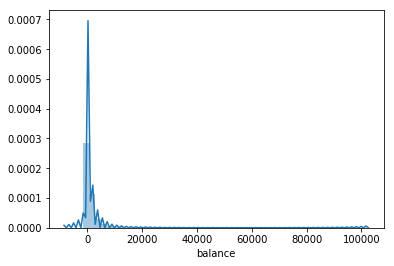

In [31]:
#账户余额
sns.distplot(train["balance"])

In [32]:
train['balance'].describe()

count     25317.000000
mean       1357.555082
std        2999.822811
min       -8019.000000
25%          73.000000
50%         448.000000
75%        1435.000000
max      102127.000000
Name: balance, dtype: float64

账户余额长尾分布明显，同时有负值，代表余额为负，可以在这里取一些分类特征

In [33]:
train['balance<0'] = train['balance'].apply(lambda x: 0 if x<0 else 1)

In [34]:
train.groupby(['balance<0','y'])['y'].count()

balance<0  y
0          0     2019
           1      116
1          0    20337
           1     2845
Name: y, dtype: int64

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


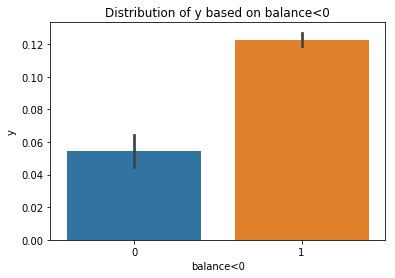

In [35]:
sns.barplot(x="balance<0", y="y", data=train)
plt.title("Distribution of y based on balance<0")
plt.show()

In [36]:
def balance_cut(x):
    if x<0:
        return 1
    elif x<2000:
        return 2
    else:
        return 3
    return x
train['balance_cut'] = train['balance'].apply(balance_cut)

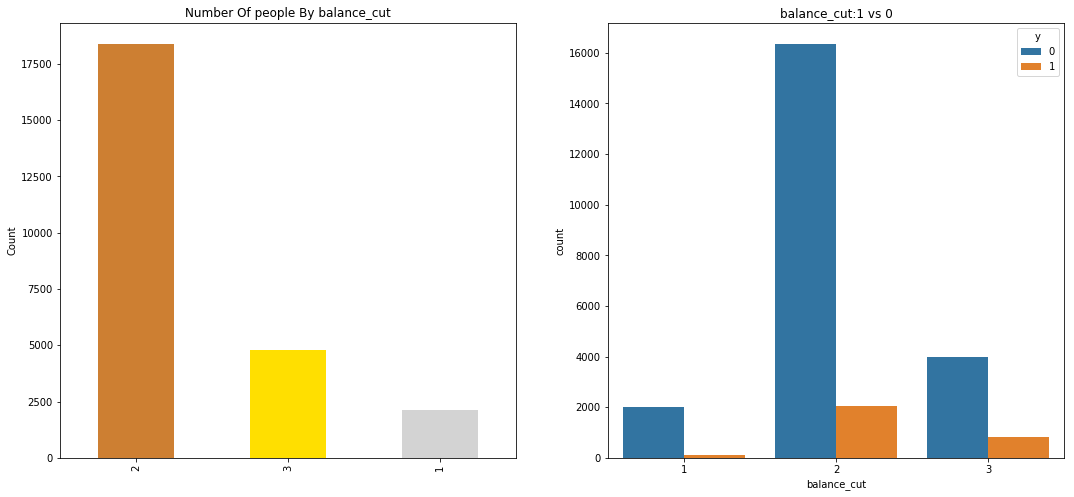

In [37]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['balance_cut'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of people By balance_cut')
ax[0].set_ylabel('Count')
sns.countplot('balance_cut',hue='y',data=train,ax=ax[1])
ax[1].set_title('balance_cut:1 vs 0')
plt.show()

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


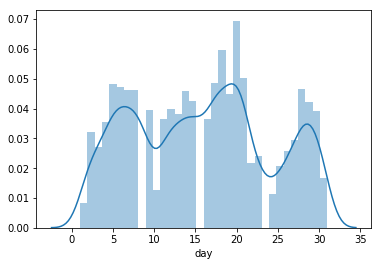

In [38]:
#最后一次与客户联系的时间
sns.distplot(train["day"])

In [39]:
train['day'].value_counts().sort_index()

1      183
2      717
3      605
4      792
5     1081
6     1056
7     1034
8     1031
9      880
10     287
11     815
12     888
13     856
14    1023
15     952
16     816
17    1086
18    1331
19    1001
20    1552
21    1121
22     484
23     541
24     255
25     466
26     576
27     658
28    1037
29     945
30     874
31     374
Name: day, dtype: int64

时间段有很明显的周期性，有的时间人很多，有的时间段人很少

In [40]:
#最后一次购买月份与标签的关系
pd.crosstab(train.month,train.y,margins=True).style.background_gradient(cmap='summer_r')

y,0,1,All
month,,,
apr,1342,327,1669
aug,3108,374,3482
dec,55,48,103
feb,1212,252,1464
jan,688,89,777
jul,3582,355,3937
jun,2674,294,2968
mar,124,145,269
may,7154,501,7655


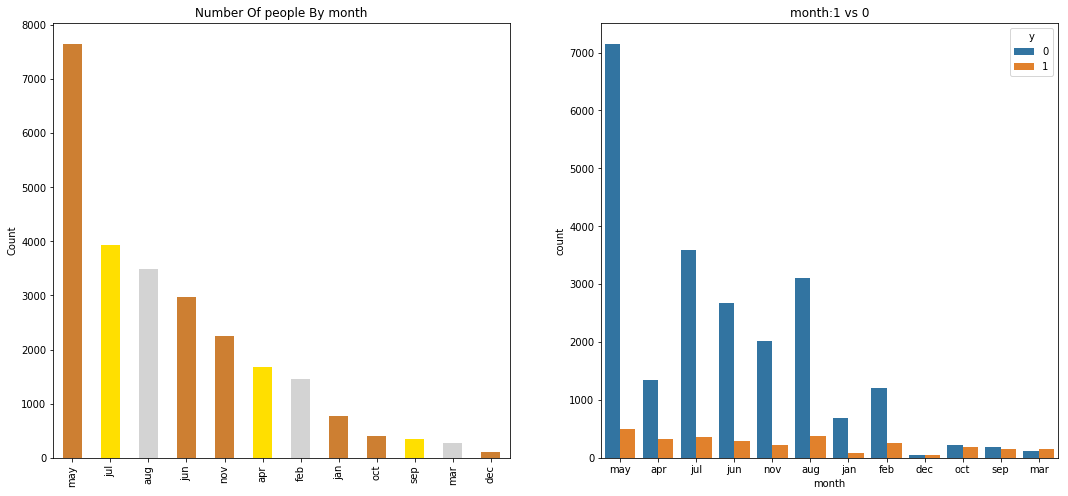

In [41]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['month'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of people By month')
ax[0].set_ylabel('Count')
sns.countplot('month',hue='y',data=train,ax=ax[1])
ax[1].set_title('month:1 vs 0')
plt.show()

不同的月份存在着很大差别

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


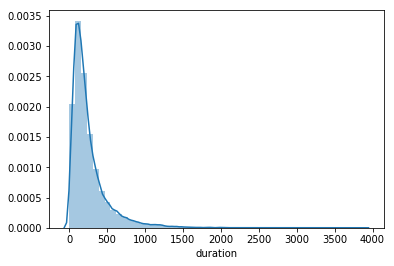

In [42]:
#最后一次联系的时长
sns.distplot(train["duration"])

明显的偏态分布，可以做一下log转换

In [43]:
train["duration"] = np.log1p(train["duration"])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


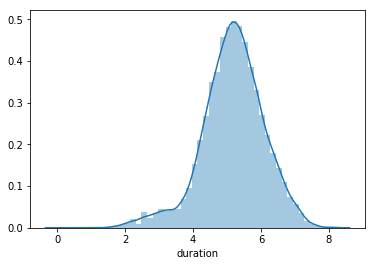

In [44]:
sns.distplot(train["duration"])

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


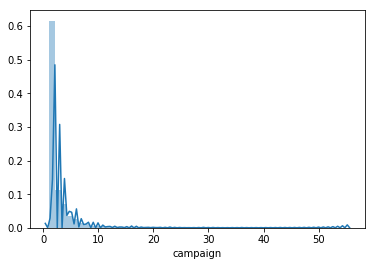

In [45]:
sns.distplot(train["campaign"])

In [46]:
train['campaign'].value_counts()

1     9825
2     7009
3     3098
4     1957
5      989
6      723
7      406
8      302
9      183
10     150
11     111
12      82
13      62
16      52
14      50
17      49
15      44
18      30
19      26
20      23
21      21
23      17
25      12
22      12
29      12
24      10
31       8
26       8
28       7
27       7
32       7
36       4
34       4
30       4
33       3
43       2
50       2
44       1
51       1
35       1
37       1
55       1
41       1
Name: campaign, dtype: int64

In [47]:
train['campaign'].describe()

count    25317.000000
mean         2.772050
std          3.136097
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         55.000000
Name: campaign, dtype: float64

75>的在三次以内。长尾分布明显，考虑离散化。

In [48]:
def campaign_cut(x):
    if x == 1:
        return 1
    elif x == 2:
        return 2
    elif x <= 4:
        return 3
    elif x<=11:
        return 4
    else:
        return 5
train['campaign_cut'] = train['campaign'].apply(campaign_cut)    

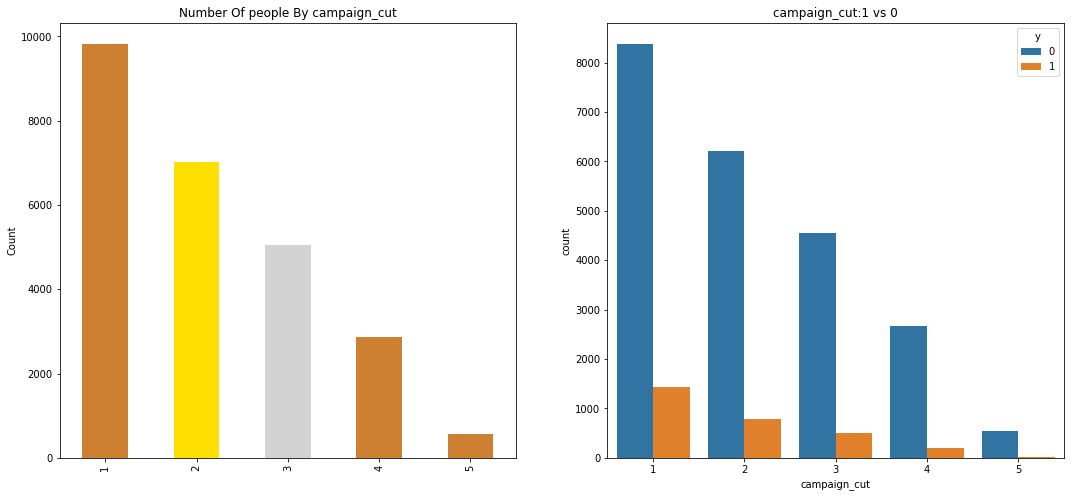

In [49]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['campaign_cut'].value_counts().plot.bar(color=['#CD7F32','#FFDF00','#D3D3D3'],ax=ax[0])
ax[0].set_title('Number Of people By campaign_cut')
ax[0].set_ylabel('Count')
sns.countplot('campaign_cut',hue='y',data=train,ax=ax[1])
ax[1].set_title('campaign_cut:1 vs 0')
plt.show()

没有明显发现

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


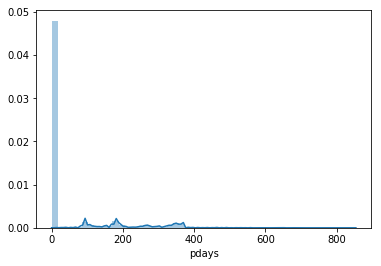

In [50]:
sns.distplot(train["pdays"])

In [51]:
train['pdays'].value_counts()

-1      20674
 182       93
 92        87
 183       77
 91        76
 181       66
 370       57
 95        49
 94        45
 184       44
 175       44
 185       43
 349       38
 350       38
 364       38
 188       37
 343       35
 189       35
 93        34
 96        34
 351       33
 186       32
 174       32
 97        32
 368       31
 357       30
 342       30
 344       30
 196       30
 347       30
        ...  
 450        1
 434        1
 633        1
 26         1
 690        1
 42         1
 405        1
 282        1
 410        1
 426        1
 442        1
 674        1
 850        1
 440        1
 393        1
 520        1
 536        1
 648        1
 680        1
 792        1
 25         1
 409        1
 3          1
 457        1
 489        1
 553        1
 51         1
 585        1
 19         1
 655        1
Name: pdays, Length: 493, dtype: int64

-1应该是代表缺失值

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


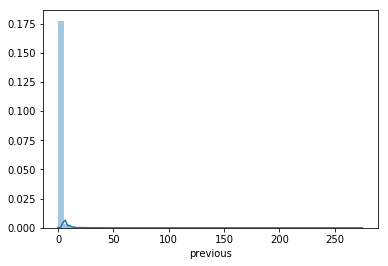

In [52]:
sns.distplot(train["previous"])

In [53]:
train['previous'].value_counts()

0      20674
1       1544
2       1178
3        631
4        413
5        270
6        152
7        120
8         73
9         50
11        39
10        37
12        30
13        24
15        15
14        10
16         9
23         5
24         4
17         4
22         4
20         4
19         4
25         3
21         3
18         3
30         2
26         2
27         2
29         2
32         1
58         1
275        1
37         1
41         1
38         1
Name: previous, dtype: int64

长尾分布的特征

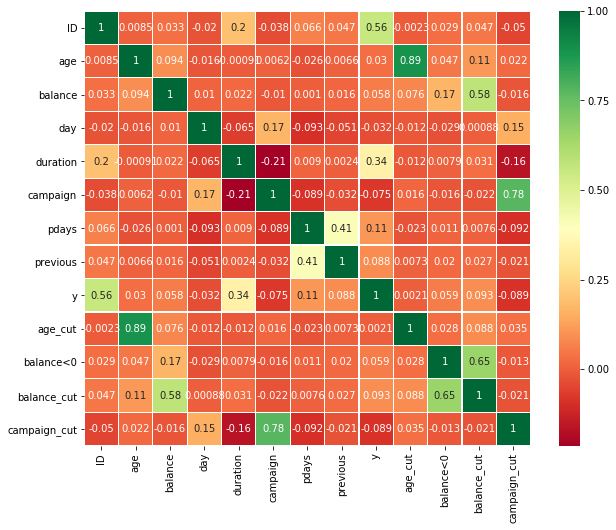

In [54]:
sns.heatmap(train.corr(),annot=True,cmap='RdYlGn',linewidths=0.2) 
fig=plt.gcf()
fig.set_size_inches(10,8)
plt.show()

ID 与 y相关性很高，应该是一个leak特征